In [1]:
import pickle
import missingno as msno
from matplotlib import font_manager, rc
from module.module import *


plt.rcParams['axes.unicode_minus'] = False
rc('font', family='AppleGothic')

pd.set_option('display.max_columns', None)

# 유저, 팀 데이터셋 로드 및 데이터 전처리

In [3]:
with open('datas/participants.pkl', 'rb') as f:
    participant_df = pickle.load(f)
    
with open('datas/participantextendedstats.pkl', 'rb') as f:
    participantextendedstat_df = pickle.load(f)
    
with open('datas/teams.pkl', 'rb') as f:
    team_df = pickle.load(f)

In [4]:
participant_df.tail(1)

,physicaldamagedealt,neutralminionskilledteamjungle,magicdamagedealt,totalplayerscore,deaths,win,neutralminionskilledenemyjungle,largestcriticalstrike,totaldamagedealt,magicdamagedealttochampions,visionwardsboughtingame,damagedealttoobjectives,largestkillingspree,item1,quadrakills,totaltimecrowdcontroldealt,wardskilled,firsttowerassist,firsttowerkill,item2,item3,item0,firstbloodassist,visionscore,wardsplaced,item4,item5,item6,turretkills,triplekills,damageselfmitigated,champlevel,goldearned,magicaldamagetaken,kills,doublekills,truedamagetaken,assists,unrealkills,neutralminionskilled,objectiveplayerscore,combatplayerscore,damagedealttoturrets,physicaldamagedealttochampions,goldspent,truedamagedealt,truedamagedealttochampions,participantid,pentakills,totalheal,totalminionskilled,firstbloodkill,largestmultikill,sightwardsboughtingame,totaldamagedealttochampions,totalunitshealed,inhibitorkills,totalscorerank,totaldamagetaken,killingsprees,timeccingothers,physicaldamagetaken,perk0,perk0var1,perk0var2,perk0var3,perk1,perk1var1,perk1var2,perk1var3,perk2,perk2var1,perk2var2,perk2var3,perk3,perk3var1,perk3var2,perk3var3,perk4,perk4var1,perk4var2,perk4var3,perk5,perk5var1,perk5var2,perk5var3,perkprimarystyle,perksubstyle,longesttimespentliving,statperk0,statperk1,statperk2,role,championid,spell1id,spell2id,firstinhibitorkill,firstinhibitorassist
1698279,30828,0,134,0,6,True,0,0,37847,134,6,1729,0,3147,0,70,19,False,False,3857,3117,2055,False,120,53,3179,3814,3364,0,0,11062,14,11249,4715,1,0,517,9,0,5,0,0,0,7065,10150,6884,878,10,0,2646,60,False,1,0,8078,1,0,0,16675,0,15,11441,8439,134,0,0,8446,0,0,0,8473,885,0,0,8242,43,0,0,8136,20,30,0,8106,4,0,0,8400,8100.0,918,5008,5008,5002,DUO_SUPPORT,555,14,4,False,False


In [5]:
participantextendedstat_df.tail(1)

,position,tier,tierrank,leaguepoints
1698279,SUPPORT,PLATINUM,I,0


In [6]:
team_df.tail(1)

,firstdragon,firstinhibitor,baronkills,firstriftherald,firstbaron,riftheraldkills,firstblood,teamid,firsttower,vilemawkills,inhibitorkills,towerkills,dominionvictoryscore,win,dragonkills,bans,gameduration
1698279,True,False,2,True,True,2,True,200,True,0,2,10,0,Win,4,60,2043


## 유저 경기정보 데이터셋 전처리
- 변수의 데이터 종류가 유니크한 변수 제거
- 결측 데이터 전처리
- 분석에 불필요한 변수 제거

#### 변수의 데이터 종류가 유니크한 변수 제거

In [7]:
del_cols_1 = []
for col in participant_df.columns:
    if participant_df[col].nunique() == 1:
        print(f'Column: {col}, {participant_df[col].unique()}')
        del_cols_1.append(col)

Column: totalplayerscore, [0]
Column: firstbloodassist, [False nan]
Column: unrealkills, [0]
Column: objectiveplayerscore, [0]
Column: combatplayerscore, [0]
Column: sightwardsboughtingame, [0]
Column: totalscorerank, [0]


In [8]:
participant_df.drop(columns=del_cols_1, inplace=True)
participant_df.tail(2)

,physicaldamagedealt,neutralminionskilledteamjungle,magicdamagedealt,deaths,win,neutralminionskilledenemyjungle,largestcriticalstrike,totaldamagedealt,magicdamagedealttochampions,visionwardsboughtingame,damagedealttoobjectives,largestkillingspree,item1,quadrakills,totaltimecrowdcontroldealt,wardskilled,firsttowerassist,firsttowerkill,item2,item3,item0,visionscore,wardsplaced,item4,item5,item6,turretkills,triplekills,damageselfmitigated,champlevel,goldearned,magicaldamagetaken,kills,doublekills,truedamagetaken,assists,neutralminionskilled,damagedealttoturrets,physicaldamagedealttochampions,goldspent,truedamagedealt,truedamagedealttochampions,participantid,pentakills,totalheal,totalminionskilled,firstbloodkill,largestmultikill,totaldamagedealttochampions,totalunitshealed,inhibitorkills,totaldamagetaken,killingsprees,timeccingothers,physicaldamagetaken,perk0,perk0var1,perk0var2,perk0var3,perk1,perk1var1,perk1var2,perk1var3,perk2,perk2var1,perk2var2,perk2var3,perk3,perk3var1,perk3var2,perk3var3,perk4,perk4var1,perk4var2,perk4var3,perk5,perk5var1,perk5var2,perk5var3,perkprimarystyle,perksubstyle,longesttimespentliving,statperk0,statperk1,statperk2,role,championid,spell1id,spell2id,firstinhibitorkill,firstinhibitorassist
1698278,193581,4,686,6,True,10,873,199392,149,2,10995,4,3812,0,110,6,False,False,3742,3046,3076,22,5,3047,3078,3364,3,1,57717,18,17547,6188,13,2,7801,8,21,5818,28650,16283,5124,4984,9,0,8341,240,True,3,33784,1,0,35843,4,45,21854,8010,2632,0,0,9111,2541,420,0,9105,13,50,0,8299,1469,0,0,8275,12,0,0,8210,0,0,0,8000,8200.0,831,5008,5008,5002,SOLO,86,4,14,False,False
1698279,30828,0,134,6,True,0,0,37847,134,6,1729,0,3147,0,70,19,False,False,3857,3117,2055,120,53,3179,3814,3364,0,0,11062,14,11249,4715,1,0,517,9,5,0,7065,10150,6884,878,10,0,2646,60,False,1,8078,1,0,16675,0,15,11441,8439,134,0,0,8446,0,0,0,8473,885,0,0,8242,43,0,0,8136,20,30,0,8106,4,0,0,8400,8100.0,918,5008,5008,5002,DUO_SUPPORT,555,14,4,False,False


#### 분석에 불필요한 변수 제거
- 아이템 정보와 스펠, 룬에 대한 정보제공은 이미 오피지지에서 구체적인 서비스를 제공하고 있으며, 일반적으로 정해진 형식이 있기에 그 외의 유저 경기스텟을 사용
- 데이터셋에 플레이시간 및 포지션 정보 추가

In [9]:
del_cols_2 = []
for target in ['id', 'item', 'perk', 'role']:
    cols = participant_df.columns[participant_df.columns.str.contains(target)].tolist()
    del_cols_2.extend(cols)
    
print(del_cols_2)

['participantid', 'championid', 'spell1id', 'spell2id', 'item1', 'item2', 'item3', 'item0', 'item4', 'item5', 'item6', 'perk0', 'perk0var1', 'perk0var2', 'perk0var3', 'perk1', 'perk1var1', 'perk1var2', 'perk1var3', 'perk2', 'perk2var1', 'perk2var2', 'perk2var3', 'perk3', 'perk3var1', 'perk3var2', 'perk3var3', 'perk4', 'perk4var1', 'perk4var2', 'perk4var3', 'perk5', 'perk5var1', 'perk5var2', 'perk5var3', 'perkprimarystyle', 'perksubstyle', 'statperk0', 'statperk1', 'statperk2', 'role']


In [10]:
champion_id = participant_df['championid']

In [11]:
participant_df.drop(columns=del_cols_2, inplace=True)
participant_df.tail(2)

,physicaldamagedealt,neutralminionskilledteamjungle,magicdamagedealt,deaths,win,neutralminionskilledenemyjungle,largestcriticalstrike,totaldamagedealt,magicdamagedealttochampions,visionwardsboughtingame,damagedealttoobjectives,largestkillingspree,quadrakills,totaltimecrowdcontroldealt,wardskilled,firsttowerassist,firsttowerkill,visionscore,wardsplaced,turretkills,triplekills,damageselfmitigated,champlevel,goldearned,magicaldamagetaken,kills,doublekills,truedamagetaken,assists,neutralminionskilled,damagedealttoturrets,physicaldamagedealttochampions,goldspent,truedamagedealt,truedamagedealttochampions,pentakills,totalheal,totalminionskilled,firstbloodkill,largestmultikill,totaldamagedealttochampions,totalunitshealed,inhibitorkills,totaldamagetaken,killingsprees,timeccingothers,physicaldamagetaken,longesttimespentliving,firstinhibitorkill,firstinhibitorassist
1698278,193581,4,686,6,True,10,873,199392,149,2,10995,4,0,110,6,False,False,22,5,3,1,57717,18,17547,6188,13,2,7801,8,21,5818,28650,16283,5124,4984,0,8341,240,True,3,33784,1,0,35843,4,45,21854,831,False,False
1698279,30828,0,134,6,True,0,0,37847,134,6,1729,0,0,70,19,False,False,120,53,0,0,11062,14,11249,4715,1,0,517,9,5,0,7065,10150,6884,878,0,2646,60,False,1,8078,1,0,16675,0,15,11441,918,False,False


In [12]:
participant_df['gameduration'] = team_df['gameduration']
participant_df['championid'] = champion_id
participant_df['position'] = participantextendedstat_df['position']

#### 결측 데이터 전처리

In [13]:
participant_df[participant_df.columns[participant_df.isna().sum() > 1]].isna().sum()

firsttowerassist         21260
firsttowerkill           21260
firstbloodkill            4370
firstinhibitorkill      398760
firstinhibitorassist    398760
dtype: int64

- firstblood 변수의 결측데이터는 4370개이며, 최대 플레이시간은 605초, 따라서 비정상적으로 끝난 게임이라고 판단하에 삭제

In [14]:
print(len(participant_df[participant_df['firstbloodkill'].isna()].index))
print(np.max(participant_df[participant_df['firstbloodkill'].isna()]['gameduration']))
del_idx_1 = participant_df[participant_df['firstbloodkill'].isna()].index

4370
605


In [15]:
participant_df.drop(index=del_idx_1, inplace=True)

- firstblood 변수의 결측데이터 삭제 후, 15분 미만 게임에서 firsttower 변수의 결측데이터는 14800개, 해당 데이터들의 최대 플레이시간은 237초 -> 제거

In [16]:
print(len(participant_df[(participant_df['firsttowerkill'].isna()) & (participant_df['gameduration'] < 900)].sort_values('gameduration', ascending=False).index))
print(np.max(participant_df[(participant_df['firsttowerkill'].isna()) & (participant_df['gameduration'] < 900)]['gameduration']))
del_idx_2 = participant_df[(participant_df['firsttowerkill'].isna()) & (participant_df['gameduration'] < 900)].sort_values('gameduration', ascending=False).index

14800
237


In [17]:
participant_df.drop(index=del_idx_2, inplace=True)

- firstinhibitor 변수의 결측 데이터들의 최소 플레이시간은 15분 이상이므로 정상데이터지만 조기서렌 등으로 끝난 정상 게임 데이터라고 판단 -> 삭제X

In [18]:
np.min(participant_df[participant_df['firstinhibitorkill'].isna()]['gameduration'])

910

- 비정상 결측 데이터를 제거하고 남은 결측 데이터들은 NaN -> False로 변환

In [19]:
participant_df['firsttowerassist'] = participant_df['firsttowerassist'].fillna(False)
participant_df['firsttowerkill'] = participant_df['firsttowerkill'].fillna(False)

participant_df['firstinhibitorkill'] = participant_df['firstinhibitorkill'].fillna(False)
participant_df['firstinhibitorassist'] = participant_df['firstinhibitorassist'].fillna(False)

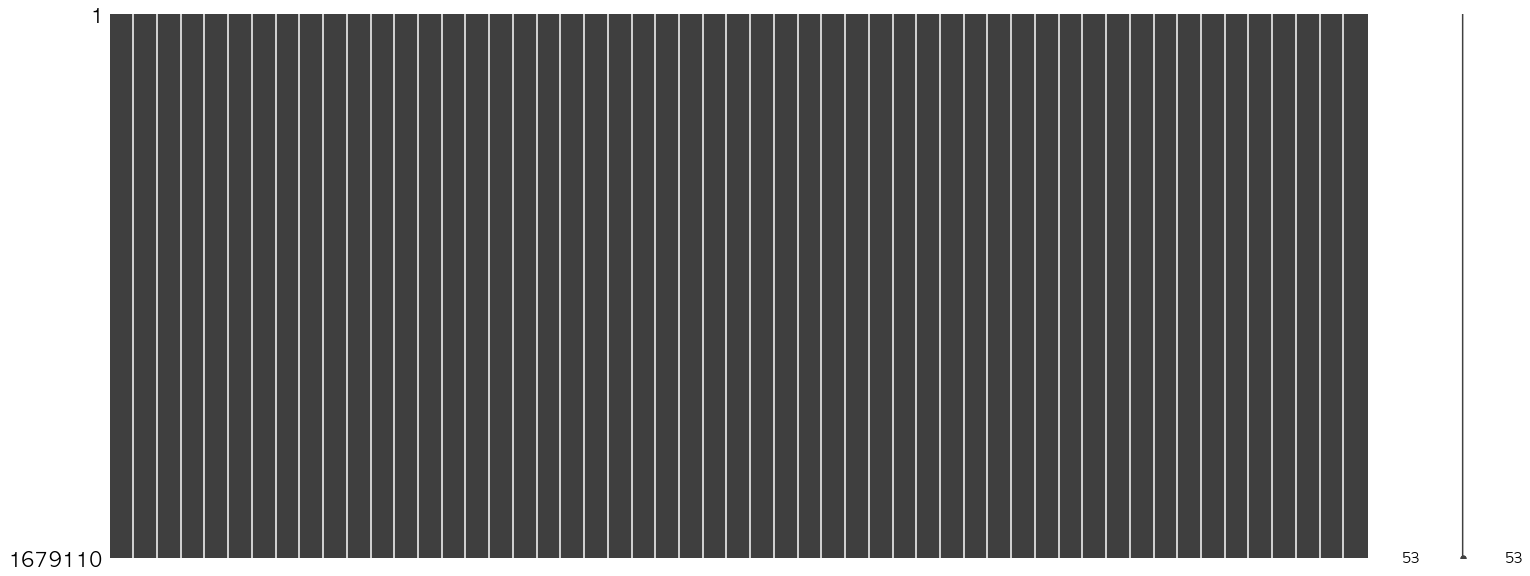

In [20]:
msno.matrix(participant_df);

- 첫번째 오브젝트 kill, assist 변수를 더하여 첫번째 오브젝트 관여여부로 변환

In [21]:
participant_df['firstinhibitor'] = (participant_df['firstinhibitorkill'] + participant_df['firstinhibitorassist']).astype('bool')
participant_df['firsttower'] = (participant_df['firsttowerkill'] + participant_df['firsttowerassist']).astype('bool')
participant_df.rename(columns={'firstbloodkill': 'firstblood'}, inplace=True)

participant_df.drop(columns=['firstinhibitorkill', 'firstinhibitorassist', 'firsttowerkill', 'firsttowerassist'],
                   inplace=True)
participant_df.reset_index(drop=True, inplace=True)
participant_df.tail(2)

,physicaldamagedealt,neutralminionskilledteamjungle,magicdamagedealt,deaths,win,neutralminionskilledenemyjungle,largestcriticalstrike,totaldamagedealt,magicdamagedealttochampions,visionwardsboughtingame,damagedealttoobjectives,largestkillingspree,quadrakills,totaltimecrowdcontroldealt,wardskilled,visionscore,wardsplaced,turretkills,triplekills,damageselfmitigated,champlevel,goldearned,magicaldamagetaken,kills,doublekills,truedamagetaken,assists,neutralminionskilled,damagedealttoturrets,physicaldamagedealttochampions,goldspent,truedamagedealt,truedamagedealttochampions,pentakills,totalheal,totalminionskilled,firstblood,largestmultikill,totaldamagedealttochampions,totalunitshealed,inhibitorkills,totaldamagetaken,killingsprees,timeccingothers,physicaldamagetaken,longesttimespentliving,gameduration,championid,position,firstinhibitor,firsttower
1679108,193581,4,686,6,True,10,873,199392,149,2,10995,4,0,110,6,22,5,3,1,57717,18,17547,6188,13,2,7801,8,21,5818,28650,16283,5124,4984,0,8341,240,True,3,33784,1,0,35843,4,45,21854,831,2043,86,MID,False,False
1679109,30828,0,134,6,True,0,0,37847,134,6,1729,0,0,70,19,120,53,0,0,11062,14,11249,4715,1,0,517,9,5,0,7065,10150,6884,878,0,2646,60,False,1,8078,1,0,16675,0,15,11441,918,2043,555,SUPPORT,False,False


In [22]:
participant_df.reset_index(drop=True, inplace=True)
participant_df.tail(2)

,physicaldamagedealt,neutralminionskilledteamjungle,magicdamagedealt,deaths,win,neutralminionskilledenemyjungle,largestcriticalstrike,totaldamagedealt,magicdamagedealttochampions,visionwardsboughtingame,damagedealttoobjectives,largestkillingspree,quadrakills,totaltimecrowdcontroldealt,wardskilled,visionscore,wardsplaced,turretkills,triplekills,damageselfmitigated,champlevel,goldearned,magicaldamagetaken,kills,doublekills,truedamagetaken,assists,neutralminionskilled,damagedealttoturrets,physicaldamagedealttochampions,goldspent,truedamagedealt,truedamagedealttochampions,pentakills,totalheal,totalminionskilled,firstblood,largestmultikill,totaldamagedealttochampions,totalunitshealed,inhibitorkills,totaldamagetaken,killingsprees,timeccingothers,physicaldamagetaken,longesttimespentliving,gameduration,championid,position,firstinhibitor,firsttower
1679108,193581,4,686,6,True,10,873,199392,149,2,10995,4,0,110,6,22,5,3,1,57717,18,17547,6188,13,2,7801,8,21,5818,28650,16283,5124,4984,0,8341,240,True,3,33784,1,0,35843,4,45,21854,831,2043,86,MID,False,False
1679109,30828,0,134,6,True,0,0,37847,134,6,1729,0,0,70,19,120,53,0,0,11062,14,11249,4715,1,0,517,9,5,0,7065,10150,6884,878,0,2646,60,False,1,8078,1,0,16675,0,15,11441,918,2043,555,SUPPORT,False,False


### 종속적인 관계의 변수 제거 및 판단기준에 부합하지 않는 변수 제거

In [23]:
del_cols_3 = ["physicaldamagedealt", "magicdamagedealt", "totaldamagedealt", "truedamagedealt", 
              "doublekills", "triplekills", "quadrakills", "pentakills", "largestmultikill", 
              "magicdamagedealttochampions", "physicaldamagedealttochampions", 
              "truedamagedealttochampions", "magicaldamagetaken", "truedamagetaken", "physicaldamagetaken"]

In [24]:
participant_df.drop(columns=del_cols_3, inplace=True)
participant_df.tail()

,neutralminionskilledteamjungle,deaths,win,neutralminionskilledenemyjungle,largestcriticalstrike,visionwardsboughtingame,damagedealttoobjectives,largestkillingspree,totaltimecrowdcontroldealt,wardskilled,visionscore,wardsplaced,turretkills,damageselfmitigated,champlevel,goldearned,kills,assists,neutralminionskilled,damagedealttoturrets,goldspent,totalheal,totalminionskilled,firstblood,totaldamagedealttochampions,totalunitshealed,inhibitorkills,totaldamagetaken,killingsprees,timeccingothers,longesttimespentliving,gameduration,championid,position,firstinhibitor,firsttower
1679105,12,3,True,1,362,5,39372,0,971,2,44,17,3,7713,17,13933,1,13,17,7563,12775,2907,247,False,16741,4,1,17772,0,35,1316,2043,22,ADC,False,False
1679106,120,3,True,30,0,2,49495,5,576,6,27,3,3,27010,18,17198,15,8,190,7793,16250,25834,51,False,24723,1,1,43029,4,11,873,2043,245,JUNGLE,False,True
1679107,0,9,True,0,0,0,10268,3,75,3,21,9,1,40330,18,15996,7,10,20,4938,14960,12947,228,False,28396,1,0,42911,2,29,293,2043,58,TOP,False,False
1679108,4,6,True,10,873,2,10995,4,110,6,22,5,3,57717,18,17547,13,8,21,5818,16283,8341,240,True,33784,1,0,35843,4,45,831,2043,86,MID,False,False
1679109,0,6,True,0,0,6,1729,0,70,19,120,53,0,11062,14,11249,1,9,5,0,10150,2646,60,False,8078,1,0,16675,0,15,918,2043,555,SUPPORT,False,False


#### 플레이시간을 분단위로 변환후 스케일링
- 스케일링 : 유저의 스텟은 플레이시간이 많을수록 비례하여 증가하기 때문에 분당스텟으로 모든 수치형변수 스케일링

In [25]:
participant_df['championid'] = participant_df['championid'].astype('str')
participant_df['gameduration'] = participant_df['gameduration'] / 60

In [26]:
for col in participant_df.columns:
    if participant_df[col].dtype == 'int64':
        participant_df[col] = participant_df[col] / participant_df['gameduration']

In [27]:
participant_df.tail(3)

,neutralminionskilledteamjungle,deaths,win,neutralminionskilledenemyjungle,largestcriticalstrike,visionwardsboughtingame,damagedealttoobjectives,largestkillingspree,totaltimecrowdcontroldealt,wardskilled,visionscore,wardsplaced,turretkills,damageselfmitigated,champlevel,goldearned,kills,assists,neutralminionskilled,damagedealttoturrets,goldspent,totalheal,totalminionskilled,firstblood,totaldamagedealttochampions,totalunitshealed,inhibitorkills,totaldamagetaken,killingsprees,timeccingothers,longesttimespentliving,gameduration,championid,position,firstinhibitor,firsttower
1679107,0.000000,0.264317,True,0.000000,0.000000,0.000000,301.556535,0.088106,2.202643,0.088106,0.616740,0.264317,0.029369,1184.434655,0.528634,469.779736,0.205580,0.293686,0.587372,145.022026,439.353891,380.234949,6.696035,False,833.950073,0.029369,0.0,1260.234949,0.058737,0.851689,8.604993,34.05,58,TOP,False,False
1679108,0.117474,0.176211,True,0.293686,25.638767,0.058737,322.907489,0.117474,3.230543,0.176211,0.646109,0.146843,0.088106,1695.066079,0.528634,515.330396,0.381791,0.234949,0.616740,170.866373,478.208517,244.963289,7.048458,True,992.187959,0.029369,0.0,1052.657856,0.117474,1.321586,24.405286,34.05,86,MID,False,False
1679109,0.000000,0.176211,True,0.000000,0.000000,0.176211,50.778267,0.000000,2.055800,0.558003,3.524229,1.556535,0.000000,324.875184,0.411160,330.367107,0.029369,0.264317,0.146843,0.000000,298.091043,77.709251,1.762115,False,237.239354,0.029369,0.0,489.720999,0.000000,0.440529,26.960352,34.05,555,SUPPORT,False,False


### 포지션별 데이터셋 세분화 후 pickle파일로 저장

In [48]:
datas = {}
for position in participant_df['position'].unique():
    position_df = participant_df[participant_df['position'] == position].reset_index(drop=True)
    
    datas[position] = position_df

In [50]:
for k, data in datas.items():
    with open(f'datas/position/{k}.pkl', 'wb') as f:
        pickle.dump(data, f)

# MID

In [11]:
import pickle

with open('datas/position/MID.pkl', 'rb') as f:
    mid_df = pickle.load(f)

    
del_list = ['deaths', 'largestcriticalstrike', 'visionwardsboughtingame',
            'largestkillingspree', 'champlevel', 'kills', 'assists', 'goldspent', 
            'firstblood', 'killingsprees', 'firstinhibitor', 'firsttower']


mid_df.drop(columns=del_list, inplace=True)


mid_df.drop(columns=['position', 'gameduration'], axis=1, inplace=True)
target_df = mid_df[['win', 'championid']]
df_x = mid_df.select_dtypes('float')

---

# 군집간 특성 파악

In [2]:
import pickle

with open('datas/position/labeled_MID.pkl', 'rb') as f:
    la_mid_df = pickle.load(f)

In [3]:
print(la_mid_df.shape)
la_mid_df.tail()

(335822, 23)


,neutralminionskilledteamjungle,win,neutralminionskilledenemyjungle,damagedealttoobjectives,totaltimecrowdcontroldealt,wardskilled,visionscore,wardsplaced,turretkills,damageselfmitigated,goldearned,neutralminionskilled,damagedealttoturrets,totalheal,totalminionskilled,totaldamagedealttochampions,totalunitshealed,inhibitorkills,totaldamagetaken,timeccingothers,longesttimespentliving,championid,label
335817,0.000000,True,0.000000,147.983707,7.790224,0.061100,0.366599,0.274949,0.030550,451.405295,317.230143,0.000000,21.109980,139.154786,4.521385,251.853360,0.152749,0.000000,461.181263,0.610998,18.543788,43,7
335818,0.101609,True,0.304826,251.329382,5.182049,0.127011,0.939881,0.406435,0.076207,1241.380186,489.906859,0.812870,82.836579,323.649450,8.179509,881.024555,0.025402,0.025402,1296.477561,0.736664,6.833192,39,4
335819,0.330229,False,0.000000,37.239627,0.889077,0.203218,0.787468,0.152413,0.000000,586.155800,362.540220,0.355631,37.239627,191.583404,4.674005,803.446232,0.025402,0.000000,862.480948,0.482642,11.405588,7,7
335820,0.117474,False,0.000000,21.644640,4.787078,0.234949,0.411160,0.117474,0.000000,535.066079,341.703377,0.234949,0.000000,168.399413,5.286344,621.497797,0.029369,0.000000,907.988253,0.117474,12.217327,91,7
335821,0.117474,True,0.293686,322.907489,3.230543,0.176211,0.646109,0.146843,0.088106,1695.066079,515.330396,0.616740,170.866373,244.963289,7.048458,992.187959,0.029369,0.000000,1052.657856,1.321586,24.405286,86,7


In [4]:
# label = -1인 Noise datas 제거
la_mid_df = la_mid_df[la_mid_df['label'] != -1]

#### 군집별 데이터의 개수 파악

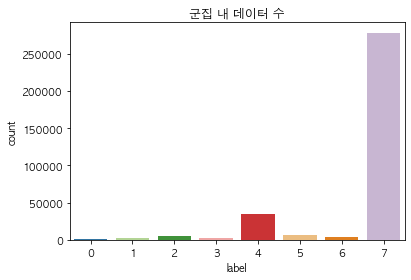

In [7]:
count_df = la_mid_df.groupby('label').size().reset_index(name='count')

sns.barplot(data=count_df, x='label', y='count', palette=palette_2)
plt.title("군집 내 데이터 수")

plt.show()

In [9]:
# 군집별 출현빈도율 column 생성
count_df['bin_rate'] = count_df['count'] / count_df['count'].sum()

#### 군집별 빈도율을 예측 데이터의 군집예측에 사용하기 위해 pickle 파일로 저장

In [22]:
label_score = {}
for i, row in count_df.iterrows():
    label_score[int(row["label"])] = row["bin_rate"]

In [23]:
label_score

{0: 0.00409136995288364,
 1: 0.00837657303035725,
 2: 0.015065306852746466,
 3: 0.006426313592175106,
 4: 0.10475040257648953,
 5: 0.02067453927357309,
 6: 0.010792031967555318,
 7: 0.8298234627542196}

In [29]:
with open('datas/label_score.pkl', 'wb') as f:
    pickle.dump(label_score, f)

#### 군집별 승률 파악

In [37]:
win_df = la_mid_df.groupby('label').agg('sum')['win'].reset_index(name='win_count')
win_df

,label,win_count
0,0,1367
1,1,1415
2,2,3774
3,3,2153
4,4,32848
5,5,6858
6,6,327
7,7,119055


In [38]:
win_df['win_rate'] = np.round((win_df['win_count'] / count_df['count'])*100, 2)
win_df

,label,win_count,win_rate
0,0,1367,99.64
1,1,1415,50.37
2,2,3774,74.70
3,3,2153,99.91
4,4,32848,93.51
5,5,6858,98.92
6,6,327,9.04
7,7,119055,42.78


#### 특정 3개의 Feature를 선택해 분포파악
-> 모두 비대칭적 분포를 보이는 것을 확인 : 통계량을 정할 때 mean보다 median으로 선택하는 것으로 결정

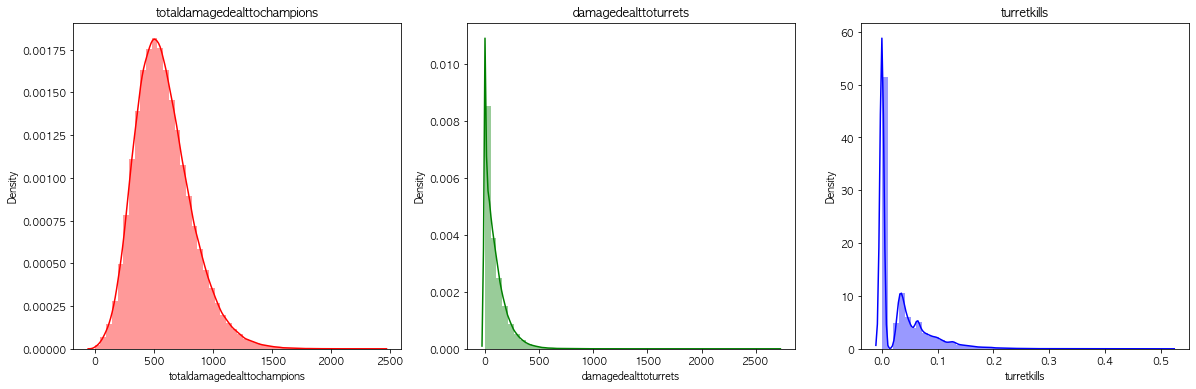

In [39]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

sns.distplot(la_mid_df['totaldamagedealttochampions'], ax=ax[0], color='r')
ax[0].set_title("totaldamagedealttochampions")

sns.distplot(la_mid_df['damagedealttoturrets'], ax=ax[1], color='g')
ax[1].set_title("damagedealttoturrets")

sns.distplot(la_mid_df['turretkills'], ax=ax[2], color='b')
ax[2].set_title("turretkills")

plt.show()

In [40]:
median_df = la_mid_df.groupby('label').agg('median').reset_index()
median_df

,label,neutralminionskilledteamjungle,win,neutralminionskilledenemyjungle,damagedealttoobjectives,totaltimecrowdcontroldealt,wardskilled,visionscore,wardsplaced,turretkills,damageselfmitigated,goldearned,neutralminionskilled,damagedealttoturrets,totalheal,totalminionskilled,totaldamagedealttochampions,totalunitshealed,inhibitorkills,totaldamagetaken,timeccingothers,longesttimespentliving
0,0,0.000000,True,0.323974,421.003661,5.387160,0.053812,0.623989,0.306122,0.136132,251.002609,498.975475,0.650850,308.665422,107.909393,8.068859,442.856258,0.062794,0.000000,422.241494,0.454300,0.000000
1,1,0.178253,True,0.000000,224.071354,10.731995,0.086414,0.727505,0.317881,0.036188,397.258883,410.500000,0.429338,107.679466,130.969388,6.366229,536.402715,0.038437,0.000000,700.162162,4.767959,19.141347
2,2,0.000000,True,0.000000,94.783696,4.072578,0.061728,0.629151,0.320146,0.000000,191.706495,387.805493,0.000000,56.404989,75.168706,6.918511,384.314825,0.063091,0.000000,367.434462,0.458954,0.000000
3,3,0.000000,True,0.000000,347.194781,5.064220,0.055607,0.646651,0.303413,0.092951,235.540190,467.548387,0.239760,257.630332,106.026751,7.386018,484.218478,0.056180,0.057915,413.408788,0.508475,0.000000
4,4,0.181543,True,0.067797,313.522976,4.676320,0.103717,0.768683,0.308483,0.062794,445.910007,446.115214,0.431396,153.198113,161.549053,6.449739,688.735399,0.035864,0.036320,685.500000,0.589595,21.674357
5,5,0.000000,True,0.000000,250.349345,5.063939,0.062176,0.668380,0.320856,0.064795,238.143010,458.885191,0.211268,186.508475,115.514019,7.563025,485.316456,0.061412,0.000000,426.209573,0.536993,0.000000
6,6,0.000000,False,0.000000,0.000000,2.652378,0.000000,0.340522,0.237154,0.000000,193.753582,251.245675,0.000000,0.000000,34.378698,3.747212,218.490566,0.065789,0.000000,416.453901,0.351391,24.140351
7,7,0.115163,False,0.000000,125.004437,4.247191,0.082759,0.677467,0.309598,0.000000,396.772083,383.484663,0.207792,50.793651,118.370119,6.214689,548.512757,0.040000,0.000000,677.323462,0.530973,20.787402


### 군집별 각 Feature의 median값에 대한 Visualization

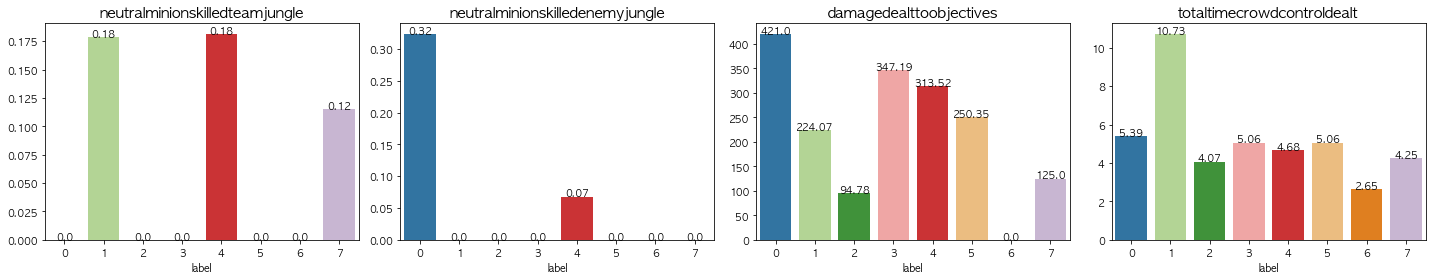

In [41]:
show_label_plot(median_df, median_df.select_dtypes('float').columns[:4].tolist())

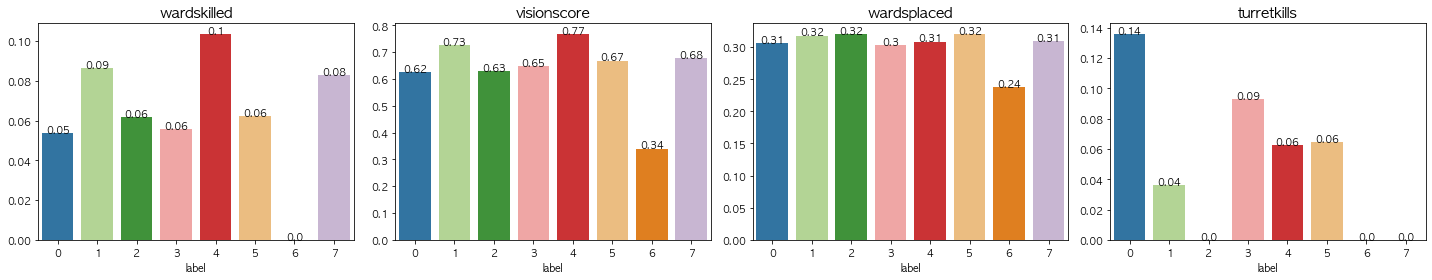

In [42]:
show_label_plot(median_df, median_df.select_dtypes('float').columns[4:8].tolist())

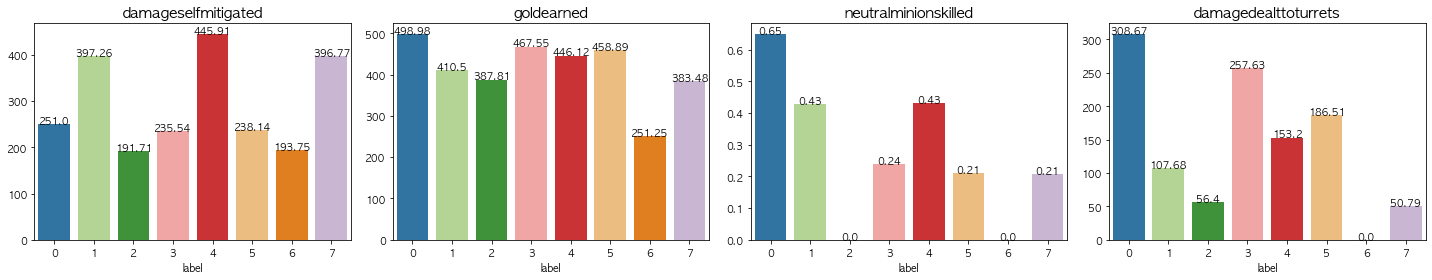

In [43]:
show_label_plot(median_df, median_df.select_dtypes('float').columns[8:12].tolist())

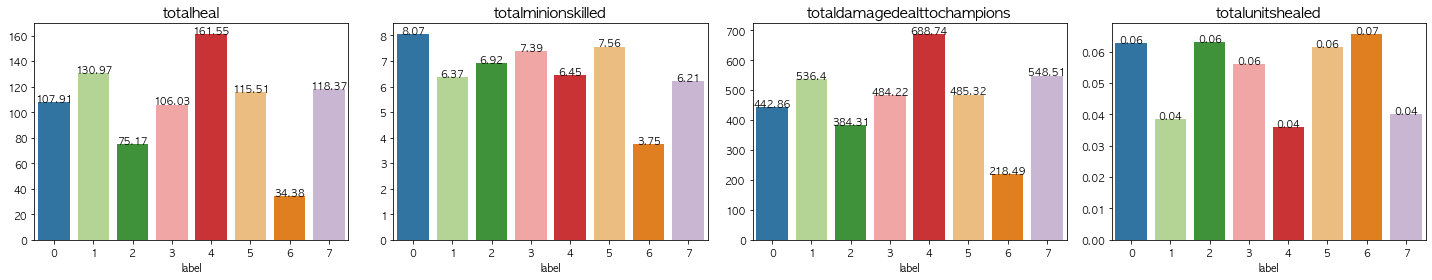

In [44]:
show_label_plot(median_df, median_df.select_dtypes('float').columns[12:16].tolist())

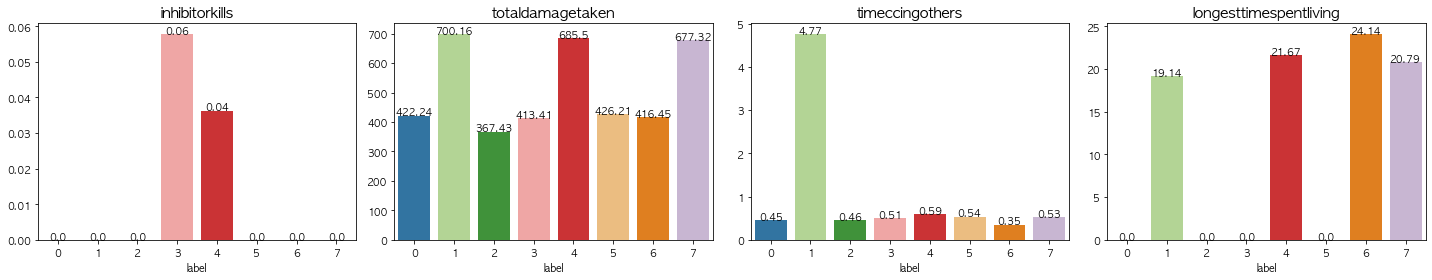

In [45]:
show_label_plot(median_df, median_df.select_dtypes('float').columns[16:20].tolist())

### 각 군집별 Best, Worst TOP2 정보 제공

In [46]:
for col in median_df.select_dtypes('float').columns:
    show_rank_label(median_df, col)
    print()

<neutralminionskilledteamjungle> : Mean=0.06
Best1 >> Cluster: 4, 평균보다 3.06배 높습니다
Best2 >> Cluster: 1, 평균보다 3.0배 높습니다
---------------------------
Worst1 >> Cluster: 0, 값이 0입니다.
Worst2 >> Cluster: 2, 값이 0입니다.

<neutralminionskilledenemyjungle> : Mean=0.05
Best1 >> Cluster: 0, 평균보다 6.62배 높습니다
Best2 >> Cluster: 4, 평균보다 1.38배 높습니다
---------------------------
Worst1 >> Cluster: 1, 값이 0입니다.
Worst2 >> Cluster: 2, 값이 0입니다.

<damagedealttoobjectives> : Mean=221.99
Best1 >> Cluster: 0, 평균보다 1.9배 높습니다
Best2 >> Cluster: 3, 평균보다 1.56배 높습니다
---------------------------
Worst1 >> Cluster: 6, 값이 0입니다.
Worst2 >> Cluster: 2, 평균보다 0.57배 낮습니다

<totaltimecrowdcontroldealt> : Mean=5.24
Best1 >> Cluster: 1, 평균보다 2.05배 높습니다
Best2 >> Cluster: 0, 평균보다 1.03배 높습니다
---------------------------
Worst1 >> Cluster: 6, 평균보다 0.49배 낮습니다
Worst2 >> Cluster: 2, 평균보다 0.22배 낮습니다

<wardskilled> : Mean=0.06
Best1 >> Cluster: 4, 평균보다 1.64배 높습니다
Best2 >> Cluster: 1, 평균보다 1.37배 높습니다
---------------------------
Worst1 >> Cluster: 6,

### 군집별 픽률이 높은 TOP3 챔피언 정보 제공

In [48]:
show_champion_label(la_mid_df)

Cluster_0 중 Pick Rate TOP3 >> Yasuo(9.55%), Yone(8.53%), Talon(6.92%)

Cluster_1 중 Pick Rate TOP3 >> Nocturne(93.13%), Chogath(4.49%), Malzahar(1.21%)

Cluster_2 중 Pick Rate TOP3 >> Akali(9.54%), Galio(6.89%), Zoe(6.04%)

Cluster_3 중 Pick Rate TOP3 >> Akali(5.71%), Zoe(5.38%), TwistedFate(5.06%)

Cluster_4 중 Pick Rate TOP3 >> Lucian(6.08%), Sylas(5.2%), Yasuo(5.2%)

Cluster_5 중 Pick Rate TOP3 >> Akali(8.34%), TwistedFate(5.51%), Zoe(5.42%)

Cluster_6 중 Pick Rate TOP3 >> Taric(6.8%), Akali(6.11%), TwistedFate(4.2%)

Cluster_7 중 Pick Rate TOP3 >> Akali(7.45%), Sylas(5.99%), Zed(5.99%)



# OLS Logistic Regressor

In [49]:
import pickle

with open('datas/position/labeled_MID.pkl', 'rb') as f:
    la_mid_df = pickle.load(f)

In [50]:
la_mid_df.drop(columns=['label', 'championid'], inplace=True)

In [51]:
df_X = la_mid_df.select_dtypes('float')
df_y = la_mid_df['win'].astype('int')

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [53]:
ss_x = pd.DataFrame(StandardScaler().fit_transform(df_X), columns=df_X.columns)
mm_x = pd.DataFrame(MinMaxScaler().fit_transform(df_X), columns=df_X.columns)
rb_x = pd.DataFrame(RobustScaler().fit_transform(df_X), columns=df_X.columns)

In [54]:
def cross_valiation_score(df, count=5, random_state=13, get_best_model=False):
    
    models = []
    scores = np.zeros(5)
    cv = KFold(count, shuffle=True, random_state=random_state)
    for i, (idx_train, idx_test) in enumerate(cv.split(df)):
        df_X = df.iloc[:, :-1]
        df_y = df['win']
        
        train_X, test_X = df_X.iloc[idx_train], df_X.iloc[idx_test]
        train_y, test_y = df_y.iloc[idx_train], df_y.iloc[idx_test]
        
        model = sm.Logit(train_y, train_X).fit(disp=0)
        models.append(model)
        
        pred = model.predict(test_X).apply(lambda x: 1 if x >= 0.5 else 0)
        
        scores[i] = np.round(accuracy_score(test_y, pred), 4)
        
    avg_score = np.mean(scores).round(4)
    print("Score :", avg_score)
    
    if get_best_model:
        idx = np.argmax(scores)
        return models[idx], scores[idx]

In [55]:
ss_df = pd.concat([ss_x, df_y], axis=1)
mm_df = pd.concat([mm_x, df_y], axis=1)
rb_df = pd.concat([rb_x, df_y], axis=1)

In [56]:
titles = ["Standard", "MinMax", "Robust"]
for idx, data in enumerate([ss_df, mm_df, rb_df]):
    print(titles[idx], end=' ')
    cross_valiation_score(data, count=5, random_state=13, get_best_model=False)

Standard Score : 0.8369
MinMax Score : 0.846
Robust Score : 0.8409


In [57]:
best_model, best_score = cross_valiation_score(mm_df, count=5, random_state=13, get_best_model=True)

Score : 0.846


In [58]:
print(best_model.summary())

                           Logit Regression Results                           
Dep. Variable:                    win   No. Observations:               268657
Model:                          Logit   Df Residuals:                   268637
Method:                           MLE   Df Model:                           19
Date:                Mon, 23 Aug 2021   Pseudo R-squ.:                  0.4836
Time:                        21:06:49   Log-Likelihood:                -96171.
converged:                       True   LL-Null:                   -1.8622e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
neutralminionskilledteamjungle     -2.1331      0.237     -9.008      0.000      -2.597      -1.669
neutralminionskilledenemyjungle     8.5353      0.203     42.144    

In [59]:
weight_df = best_model.params.reset_index(name='weight').sort_values('weight', ascending=False).reset_index(drop=True)
weight_df.rename(columns={'index': 'var'}, inplace=True)
weight_df.head()

,var,weight
0,goldearned,17.422495
1,damagedealttoturrets,16.725056
2,totalheal,13.558514
3,inhibitorkills,9.095200
4,neutralminionskilledenemyjungle,8.535284


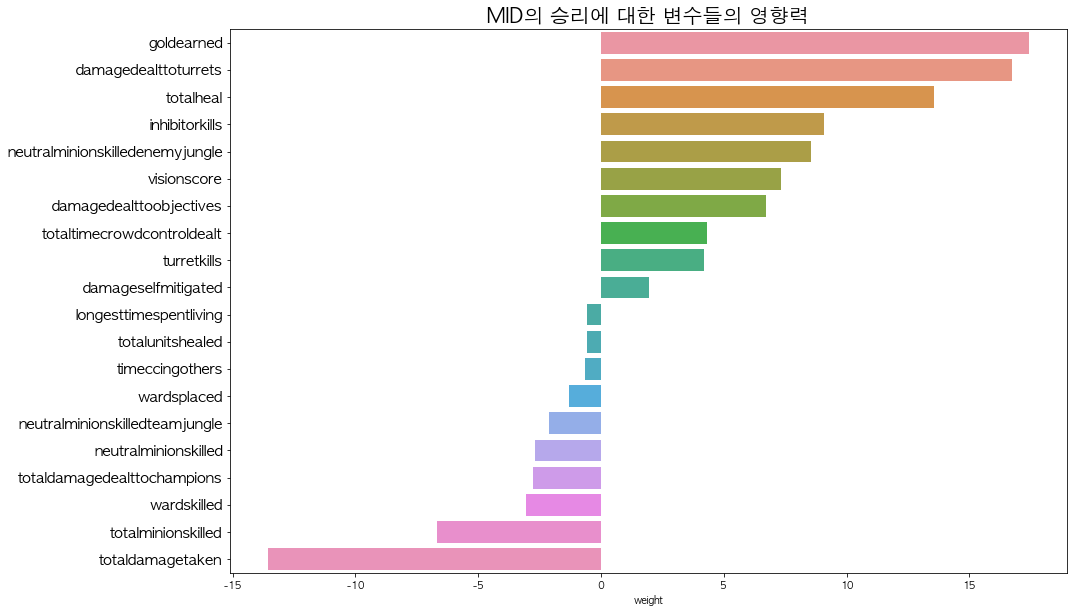

In [60]:
plt.figure(figsize=(15, 10))

sns.barplot(data=weight_df, x='weight', y='var', orient='h')
plt.ylabel(None)
plt.yticks(fontsize=15)
plt.title("MID의 승리에 대한 변수들의 영향력", fontsize=20)

plt.show()